In [2]:
import pandas as pd
import numpy as np
import datetime
import os

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(24, 15)}, font_scale=2)

import sys
sys.path.append('../')
import utils

In [3]:
%load_ext autoreload
%autoreload 2

# MDI Dataset (Hurricane)

In [4]:
df = pd.read_csv('../real_data/MDI_datasets/hurricane/HPW_2012_41046_standardized.csv')
data_output_dir = '../real_data/MDI_datasets/hurricane/'

# Convert the Date column to a pandas datetime
df = df.rename(columns={"Date": 'timestamp'})
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Add interpolation for missing values
for col_name in ['Hs (m)', 'SLP (mbar)', 'W (km/h)']:
    df[col_name] = df[col_name].interpolate()

# Save a separate dataframe for each measure
df_wave_height = df[['timestamp', 'Hs (m)']]
df_wave_height = df_wave_height.rename(columns={"Hs (m)": 'measure'})
df_wave_height.to_pickle(data_output_dir+'df_wave_height.pickle')

df_air_pressure = df[['timestamp', 'SLP (mbar)']]
df_air_pressure = df_air_pressure.rename(columns={"SLP (mbar)": 'measure'})
df_air_pressure.to_pickle(data_output_dir+'df_air_pressure.pickle')

df_wind_speed = df[['timestamp', 'W (km/h)']]
df_wind_speed = df_wind_speed.rename(columns={"W (km/h)": 'measure'})
df_wind_speed.to_pickle(data_output_dir+'df_wind_speed.pickle')

df.to_pickle(data_output_dir+'full_df_cleaned.pickle')
df

,timestamp,Hs (m),SLP (mbar),W (km/h)
0,2012-06-01 00:00:00,0.8437,1018.4,16.92
1,2012-06-01 01:00:00,0.8644,1019.0,16.20
2,2012-06-01 02:00:00,0.8607,1018.9,16.92
3,2012-06-01 03:00:00,0.8376,1018.6,15.48
4,2012-06-01 04:00:00,0.8353,1018.1,16.92
...,...,...,...,...
4388,2012-11-30 20:00:00,3.2007,1016.3,29.88
4389,2012-11-30 21:00:00,2.7657,1016.5,30.96
4390,2012-11-30 22:00:00,3.1043,1016.7,29.88
4391,2012-11-30 23:00:00,2.8690,1016.9,32.40


In [5]:
# Original dates specified by MDI
hurricanes = [
    [datetime.datetime(2012,10,22,0,0,0), datetime.datetime(2012,10,29,0,0,0)],
    [datetime.datetime(2012,10,12,0,0,0), datetime.datetime(2012,10,18,0,0,0)],
    [datetime.datetime(2012,8,22,0,0,0), datetime.datetime(2012,8,25,0,0,0)]
]

# # Dates Adjusted with time
# hurricanes = [
#     [datetime.datetime(2012,10,23,12,0,0), datetime.datetime(2012,10,30,12,0,0)],
#     [datetime.datetime(2012,10,12,20,0,0), datetime.datetime(2012,10,18,12,0,0)],
#     [datetime.datetime(2012,8,22,12,0,0), datetime.datetime(2012,8,25,0,0,0)]
# ]

regions_df = pd.DataFrame(columns=['region_id',	'start', 'end', 'start_timestamp', 'end_timestamp', 'length'])
for i in range(len(hurricanes)):
    start = df[df['timestamp'] == hurricanes[i][0]].index.values[0]
    end = df[df['timestamp'] == hurricanes[i][1]].index.values[0]
    start_timestamp = hurricanes[i][0]
    end_timestamp = hurricanes[i][1]
    
    region = [i, start, end, start_timestamp, end_timestamp, end-start+1]
    regions_df.loc[len(regions_df.index)] = region


regions_df['unix_start'] = regions_df['start_timestamp'].apply(lambda x: x.timestamp())
regions_df['unix_end'] = regions_df['end_timestamp'].apply(lambda x: x.timestamp())
regions_df.to_pickle(data_output_dir+'regions_df.pickle')
regions_df

,region_id,start,end,start_timestamp,end_timestamp,length,unix_start,unix_end
0,0,3432,3600,2012-10-22,2012-10-29,169,1.350864e+09,1.351469e+09
1,1,3192,3336,2012-10-12,2012-10-18,145,1.350000e+09,1.350518e+09
2,2,1968,2040,2012-08-22,2012-08-25,73,1.345594e+09,1.345853e+09


## Dataset Visualization

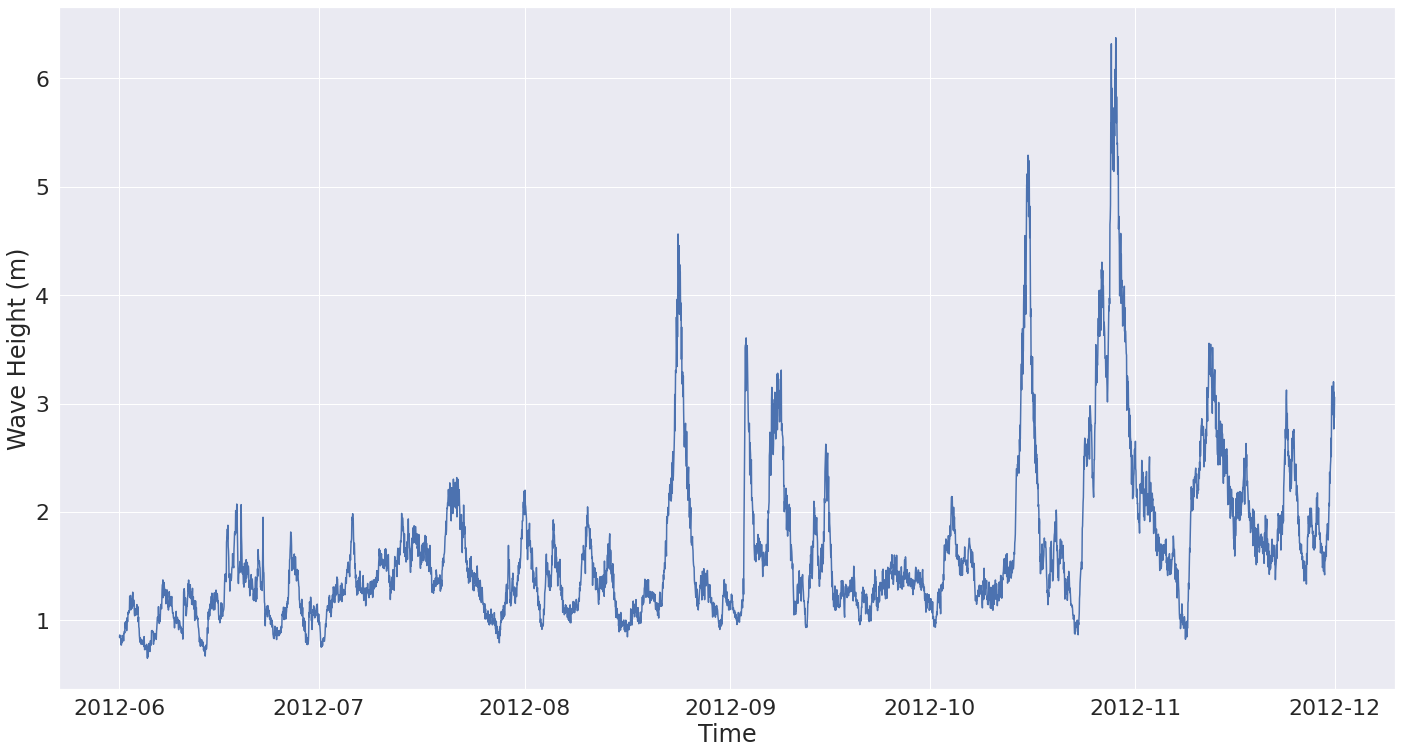

In [5]:
df_wave_height = pd.read_pickle('../real_data/MDI_datasets/hurricane/df_wave_height.pickle')
plt.plot(df_wave_height['timestamp'].values, df_wave_height['measure'].values, label='Wave Height (m)')
plt.xlabel('Time');plt.ylabel('Wave Height (m)');plt.tight_layout()
plt.savefig('../figures/real_data/MDI_datasets/hurricane/wave_height.svg')

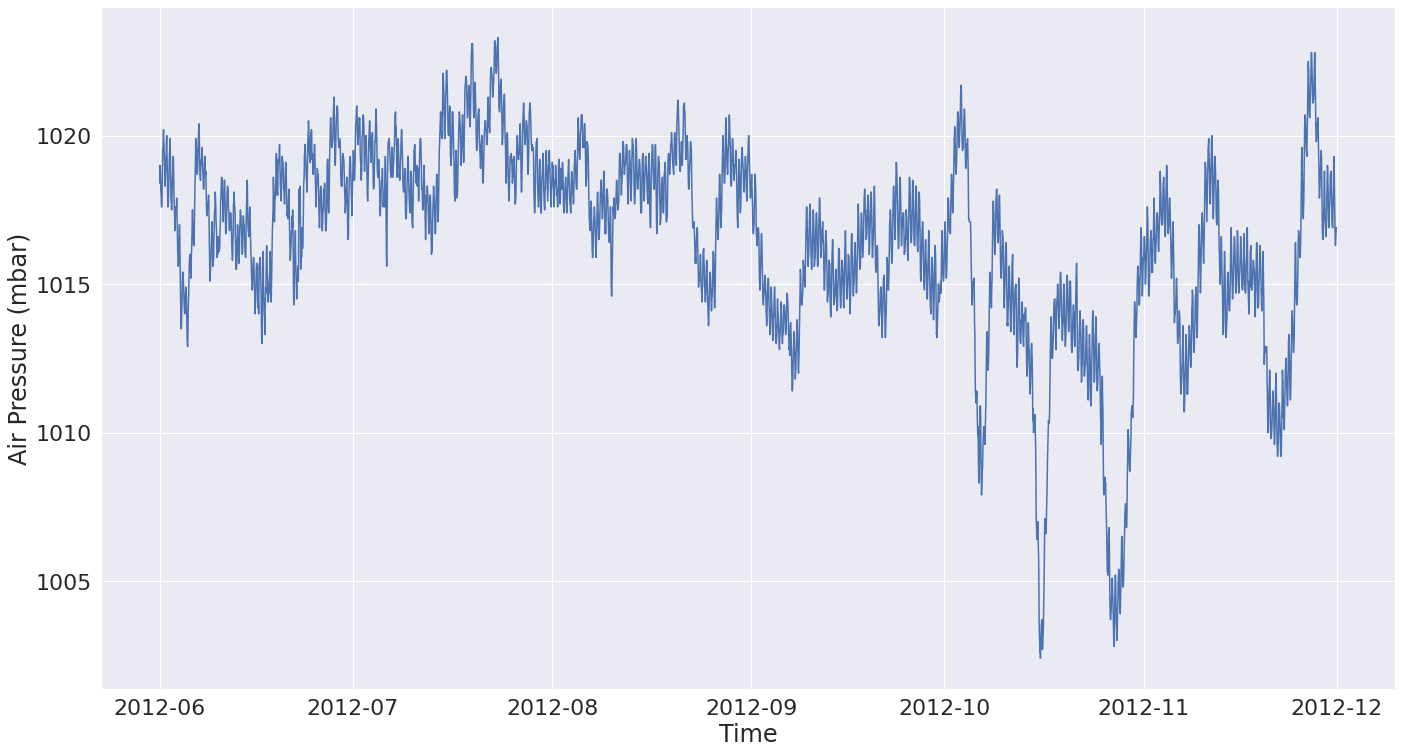

In [6]:
df_wave_height = pd.read_pickle('../real_data/MDI_datasets/hurricane/df_air_pressure.pickle')
plt.plot(df_wave_height['timestamp'].values, df_wave_height['measure'].values, label='Air Pressure (mbar)')
plt.xlabel('Time');plt.ylabel('Air Pressure (mbar)');plt.tight_layout()
plt.savefig('../figures/real_data/MDI_datasets/hurricane/air_pressure.svg')

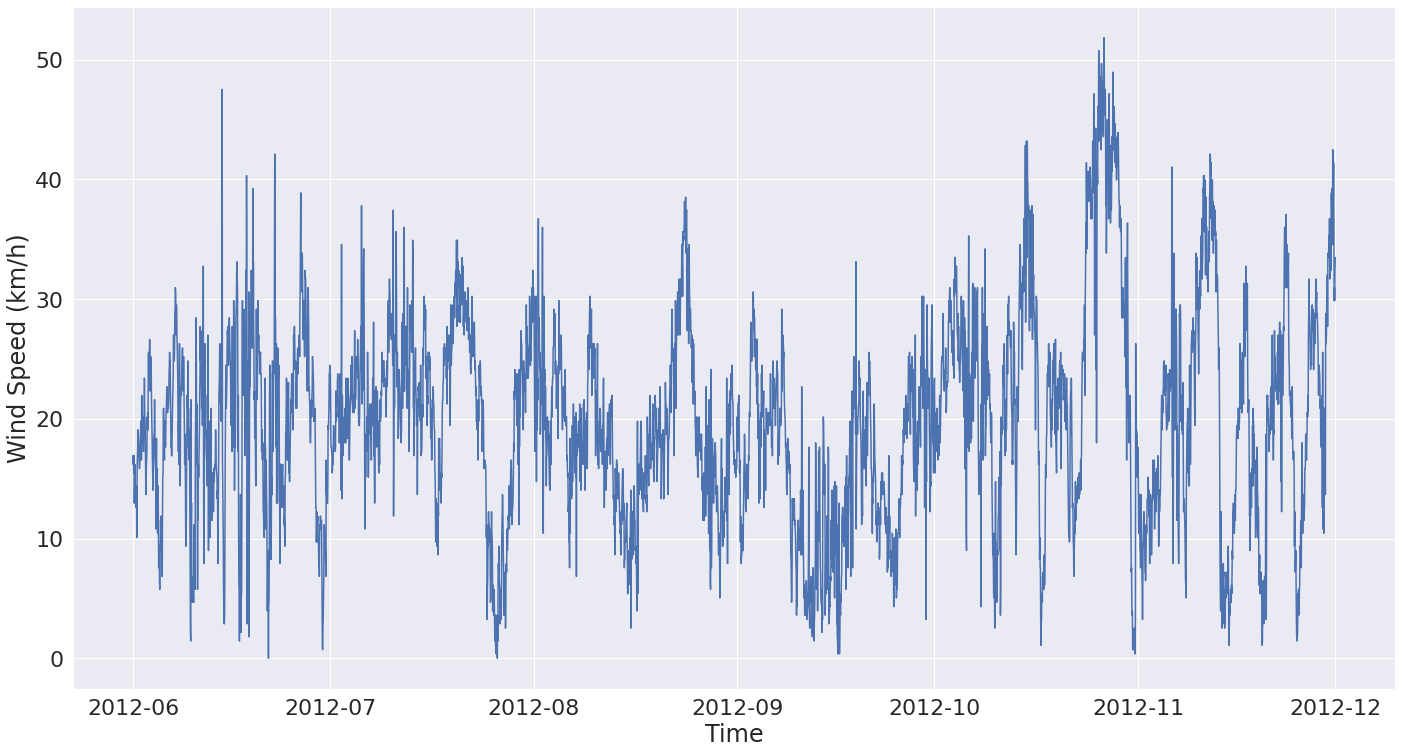

In [7]:
df_wave_height = pd.read_pickle('../real_data/MDI_datasets/hurricane/df_wind_speed.pickle')
plt.plot(df_wave_height['timestamp'].values, df_wave_height['measure'].values, label='Wind Speed (km/h)')
plt.xlabel('Time');plt.ylabel('Wind Speed (km/h)');plt.tight_layout()
plt.savefig('../figures/real_data/MDI_datasets/hurricane/wind_speed.svg')

### Normalized Dataset Visualization with Hurricane Regions

In [8]:
normalized_df=df.copy()
for col_name in ['Hs (m)', 'SLP (mbar)', 'W (km/h)']:
    normalized_df[col_name] = (df[col_name]-df[col_name].min()) / (df[col_name].max()-df[col_name].min())
normalized_df

,timestamp,Hs (m),SLP (mbar),W (km/h)
0,2012-06-01 00:00:00,0.033847,0.765550,0.326389
1,2012-06-01 01:00:00,0.037462,0.794258,0.312500
2,2012-06-01 02:00:00,0.036816,0.789474,0.326389
3,2012-06-01 03:00:00,0.032781,0.775120,0.298611
4,2012-06-01 04:00:00,0.032380,0.751196,0.326389
...,...,...,...,...
4388,2012-11-30 20:00:00,0.445492,0.665072,0.576389
4389,2012-11-30 21:00:00,0.369520,0.674641,0.597222
4390,2012-11-30 22:00:00,0.428656,0.684211,0.576389
4391,2012-11-30 23:00:00,0.387562,0.693780,0.625000


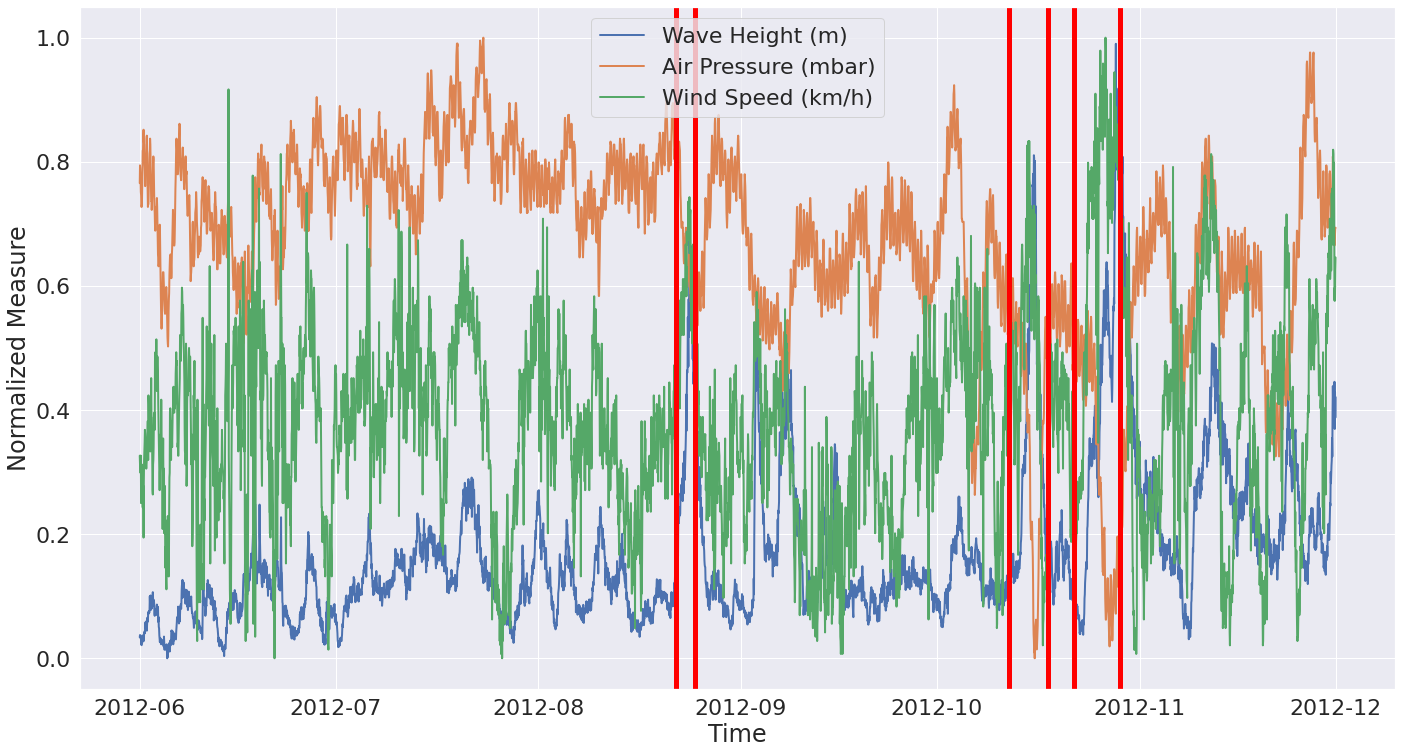

In [9]:
plt.plot(normalized_df['timestamp'].values, normalized_df['Hs (m)'].values, linewidth=2, label='Wave Height (m)')
plt.plot(normalized_df['timestamp'].values, normalized_df['SLP (mbar)'].values, linewidth=2, label='Air Pressure (mbar)')
plt.plot(normalized_df['timestamp'].values, normalized_df['W (km/h)'].values, linewidth=2, label='Wind Speed (km/h)')

for _, region in regions_df.iterrows():
    plt.axvline(region['start_timestamp'], c='red', linewidth=5)
    plt.axvline(region['end_timestamp'], c='red', linewidth=5)

plt.xlabel('Time');plt.ylabel('Normalized Measure');plt.legend();plt.tight_layout()
plt.savefig('../figures/real_data/MDI_datasets/hurricane/hurricane_raw_data_normalized.svg')

## Evaluation

In [6]:
def get_range_based_eval_scores(real_ranges, predicted_ranges, predicted_ranges_outlier_bounds):
    precision = utils.range_based_precision(real_ranges, predicted_ranges)
    recall = utils.range_based_recall(real_ranges, predicted_ranges)
    f1_score = utils.compute_f1_score(precision, recall) 
    
    precision_outlier_bounds = utils.range_based_precision(real_ranges, predicted_ranges_outlier_bounds)
    recall_precision_outlier_bounds = utils.range_based_recall(real_ranges, predicted_ranges_outlier_bounds)
    f1_score_outlier_bounds = utils.compute_f1_score(precision_outlier_bounds, recall_precision_outlier_bounds)

    print("Full Bounds:")
    print("Precision:", precision, 'Recall:', recall, 'F1-Score:', f1_score)
    print("\nOutlier Bounds:")
    print("Precision:", precision_outlier_bounds, 'Recall:', recall_precision_outlier_bounds, 'F1-Score:', f1_score_outlier_bounds)


def get_eval_scores(real_ranges, predicted_ranges):
    precision = utils.range_based_precision(real_ranges, predicted_ranges)
    recall = utils.range_based_recall(real_ranges, predicted_ranges)
    f1_score = utils.compute_f1_score(precision, recall) 
    return precision, recall, f1_score

def get_predicted_ranges(clusters_df):
    '''
    Returns two lists. The predicted_ranges list and the predicted_ranges_outlier_bounds list
    '''
    predicted_ranges = []
    predicted_ranges_outlier_bounds = []
    for _, predicted_range_row  in clusters_df.iterrows():
        predicted_range = [predicted_range_row['start'], predicted_range_row['end']]
        predicted_range_outlier_bound = [predicted_range_row['point_start'], predicted_range_row['point_end']]
        predicted_ranges.append(predicted_range)
        predicted_ranges_outlier_bounds.append(predicted_range_outlier_bound)
    return predicted_ranges, predicted_ranges_outlier_bounds

In [7]:
real_ranges = []
for _, real_range_row in regions_df.iterrows():
    real_range = [real_range_row['unix_start'], real_range_row['unix_end']]
    real_ranges.append(real_range)

### MDI (Default Parameters)

In [8]:
mdi_regions = pd.read_csv('../real_data/MDI_datasets/hurricane/mdi_top_k_regions/mdi_top10_regions_wave_height.csv')
mdi_regions['Start'] = pd.to_datetime(mdi_regions['Start'])
mdi_regions['End'] = pd.to_datetime(mdi_regions['End'])
mdi_regions['unix_start'] = mdi_regions['Start'].apply(lambda x: x.timestamp())
mdi_regions['unix_end'] = mdi_regions['End'].apply(lambda x: x.timestamp())
mdi_regions

,Start,End,Score,unix_start,unix_end
0,2012-10-28 02:00:00,2012-10-31 01:00:00,555.359183,1.351390e+09,1.351645e+09
1,2012-10-14 13:00:00,2012-10-17 01:00:00,237.123197,1.350220e+09,1.350436e+09
2,2012-08-23 05:00:00,2012-08-25 21:00:00,137.094516,1.345698e+09,1.345928e+09
3,2012-06-03 22:00:00,2012-06-06 20:00:00,117.304851,1.338761e+09,1.339013e+09
4,2012-10-26 00:00:00,2012-10-27 21:00:00,113.196041,1.351210e+09,1.351372e+09
5,2012-06-23 09:00:00,2012-06-26 08:00:00,104.800325,1.340442e+09,1.340698e+09
6,2012-07-26 03:00:00,2012-07-29 02:00:00,103.499286,1.343272e+09,1.343527e+09
7,2012-08-15 15:00:00,2012-08-18 14:00:00,103.118632,1.345043e+09,1.345298e+09
8,2012-07-06 17:00:00,2012-07-09 16:00:00,98.424602,1.341594e+09,1.341850e+09
9,2012-08-06 20:00:00,2012-08-09 06:00:00,97.817962,1.344283e+09,1.344492e+09


In [9]:
mdi_regions = mdi_regions.head(3)
predicted_ranges = []
for _, predicted_range_row  in mdi_regions.iterrows():
    predicted_range = [predicted_range_row['unix_start'], predicted_range_row['unix_end']]
    predicted_ranges.append(predicted_range)

mdi_precision = utils.range_based_precision(real_ranges, predicted_ranges)
mdi_recall = utils.range_based_recall(real_ranges, predicted_ranges)
mdi_f1_score = utils.compute_f1_score(mdi_precision, mdi_recall) 
print("Precision:", mdi_precision, 'Recall:', mdi_recall, 'F1-Score:', mdi_f1_score)

Precision: 0.6654558404558405 Recall: 0.6932540092926707 F1-Score: 0.6790705601915294


### MDI (Min Length: 50, Max Length: 100)

In [10]:
mdi_regions = pd.read_csv('../real_data/MDI_datasets/hurricane/mdi_top_k_regions/mdi_top10_regions_wave_height_50_100.csv')
mdi_regions['Start'] = pd.to_datetime(mdi_regions['Start'])
mdi_regions['End'] = pd.to_datetime(mdi_regions['End'])
mdi_regions['unix_start'] = mdi_regions['Start'].apply(lambda x: x.timestamp())
mdi_regions['unix_end'] = mdi_regions['End'].apply(lambda x: x.timestamp())
mdi_regions

,Start,End,Score,unix_start,unix_end
0,2012-10-26 10:00:00,2012-10-30 13:00:00,686.845894,1.351246e+09,1.351602e+09
1,2012-10-14 13:00:00,2012-10-17 01:00:00,237.123197,1.350220e+09,1.350436e+09
2,2012-08-23 05:00:00,2012-08-25 21:00:00,137.094516,1.345698e+09,1.345928e+09
3,2012-08-14 17:00:00,2012-08-18 20:00:00,134.725419,1.344964e+09,1.345320e+09
4,2012-08-29 17:00:00,2012-09-02 20:00:00,130.550752,1.346260e+09,1.346616e+09
5,2012-06-03 06:00:00,2012-06-07 09:00:00,126.566351,1.338703e+09,1.339060e+09
6,2012-09-26 04:00:00,2012-09-30 06:00:00,124.880350,1.348632e+09,1.348985e+09
7,2012-06-23 00:00:00,2012-06-26 11:00:00,116.574106,1.340410e+09,1.340708e+09
8,2012-07-25 18:00:00,2012-07-29 04:00:00,111.106220,1.343239e+09,1.343534e+09
9,2012-06-28 08:00:00,2012-07-02 11:00:00,110.565211,1.340870e+09,1.341227e+09


In [11]:
mdi_regions = mdi_regions.head(3)
predicted_ranges = []
for _, predicted_range_row  in mdi_regions.iterrows():
    predicted_range = [predicted_range_row['unix_start'], predicted_range_row['unix_end']]
    predicted_ranges.append(predicted_range)

mdi_precision = utils.range_based_precision(real_ranges, predicted_ranges)
mdi_recall = utils.range_based_recall(real_ranges, predicted_ranges)
mdi_f1_score = utils.compute_f1_score(mdi_precision, mdi_recall) 
print("Precision:", mdi_precision, 'Recall:', mdi_recall, 'F1-Score:', mdi_f1_score)

Precision: 0.7689743589743591 Recall: 0.7327017410480946 F1-Score: 0.7503999719159555


### Evaluation only using the Wave Height time series

#### Variable confidence interval used by Prophet

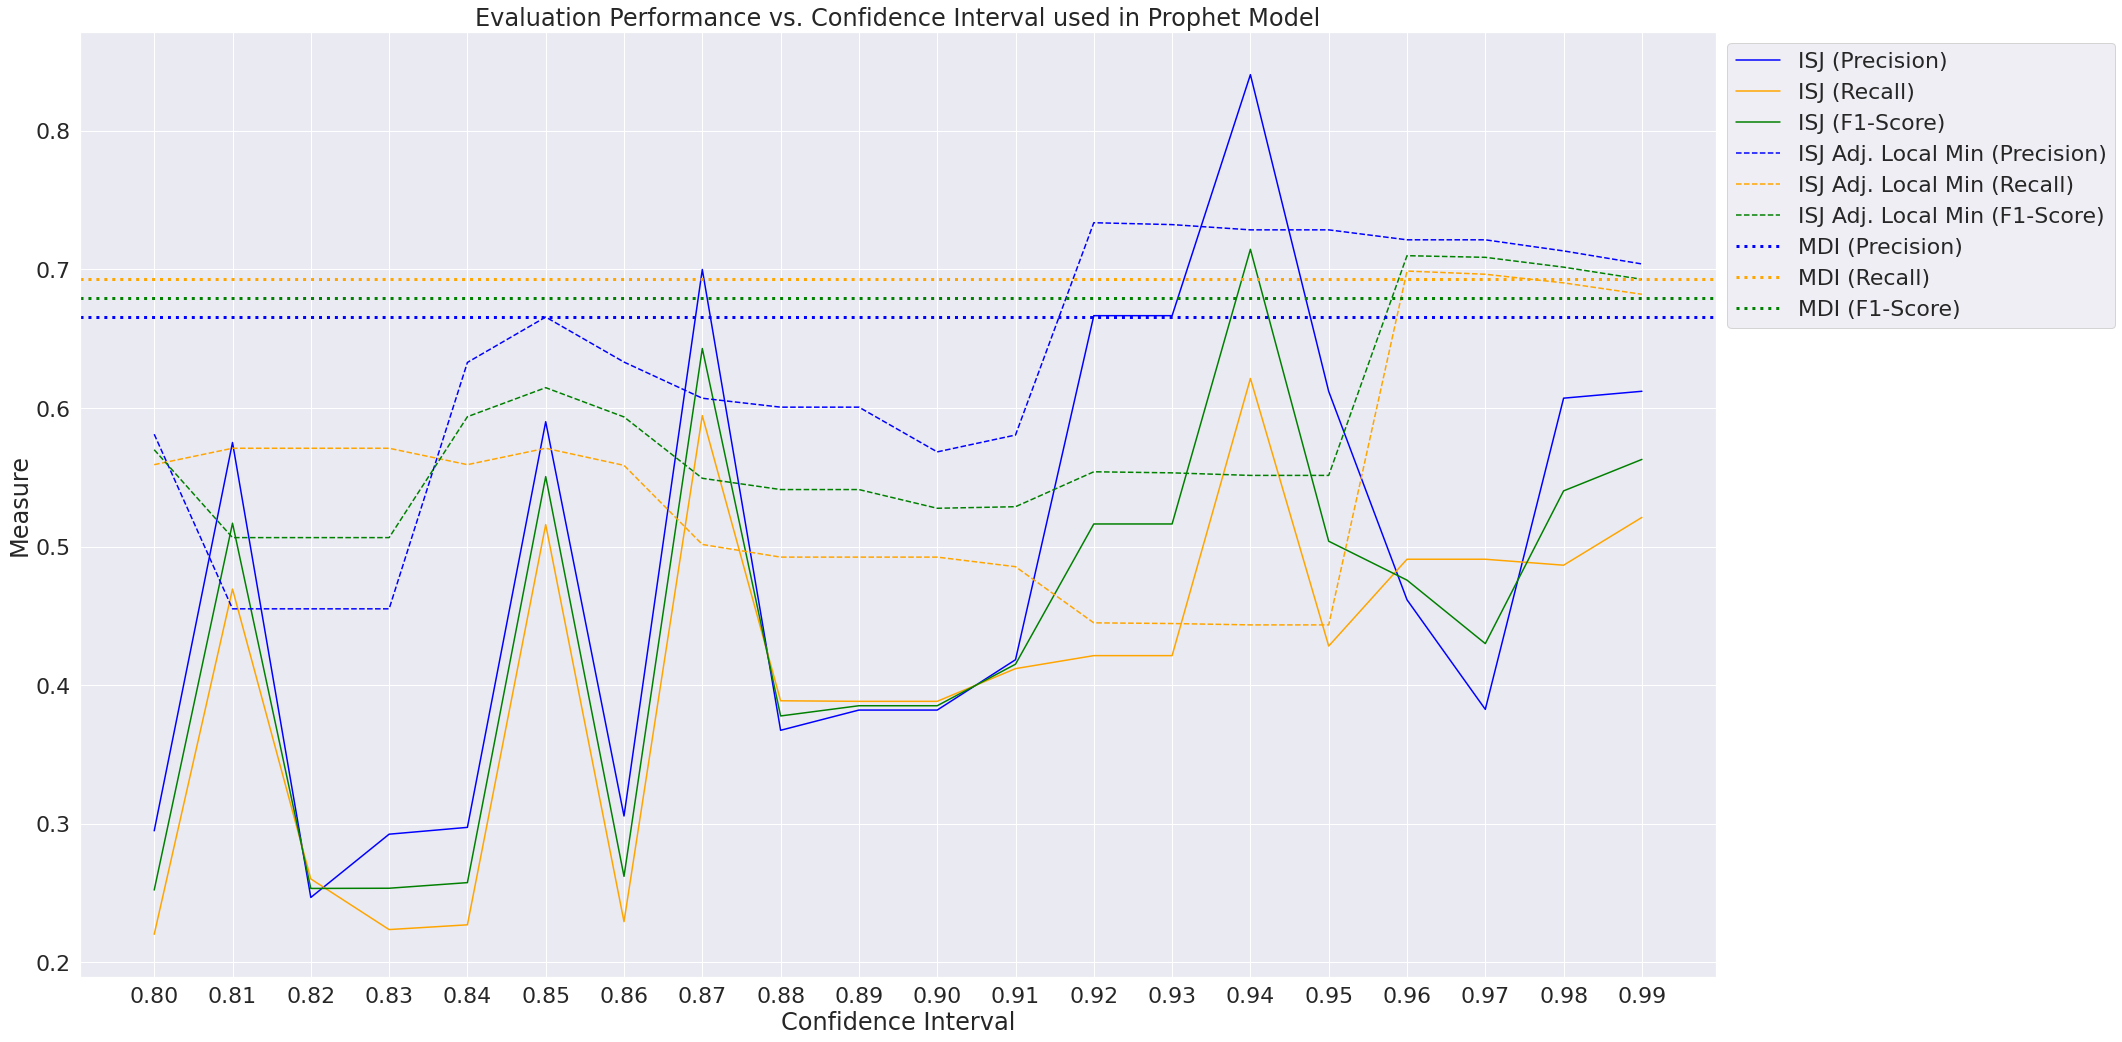

In [48]:
variable_confidence_interval_dir = '../real_data/MDI_datasets/hurricane/evaluation/variable_confidence_interval/'

confidence_intervals = []
ISJ_precision, ISJ_recall, ISJ_f1_score = [], [], []
adj_ISJ_precision, adj_ISJ_recall, adj_ISJ_f1_score = [], [], []

# Get evaluation over ISJ
for confidence_interval in sorted(os.listdir(variable_confidence_interval_dir + 'ISJ/')):
    confidence_intervals.append(confidence_interval)
    # Read the clusters_df and compute the evaluation metrics
    clusters_df = pd.read_pickle(variable_confidence_interval_dir + 'ISJ/' + confidence_interval + '/clusters_df.pickle').sort_values(by='area', ascending=False).head(3)
    predicted_ranges, predicted_ranges_outlier_bounds = get_predicted_ranges(clusters_df)
    precision, recall, f1_score = get_eval_scores(real_ranges, predicted_ranges)
    ISJ_precision.append(precision);ISJ_recall.append(recall);ISJ_f1_score.append(f1_score)

# Get evaluation over ISJ with Adjusted Local Minima
for confidence_interval in sorted(os.listdir(variable_confidence_interval_dir + 'ISJ_adj_local_min/')):
    # Read the clusters_df and compute the evaluation metrics
    clusters_df = pd.read_pickle(variable_confidence_interval_dir + 'ISJ_adj_local_min/' + confidence_interval + '/clusters_df.pickle').sort_values(by='area', ascending=False).head(3)
    predicted_ranges, predicted_ranges_outlier_bounds = get_predicted_ranges(clusters_df)
    precision, recall, f1_score = get_eval_scores(real_ranges, predicted_ranges_outlier_bounds)
    adj_ISJ_precision.append(precision);adj_ISJ_recall.append(recall);adj_ISJ_f1_score.append(f1_score)

# Plot Figure
sns.set(rc={'figure.figsize':(30, 15)}, font_scale=2)
plt.plot(confidence_intervals, ISJ_precision, label='ISJ (Precision)', color='blue')
plt.plot(confidence_intervals, ISJ_recall, label='ISJ (Recall)', color='orange')
plt.plot(confidence_intervals, ISJ_f1_score, label='ISJ (F1-Score)', color='green')

plt.plot(confidence_intervals, adj_ISJ_precision, label='ISJ Adj. Local Min (Precision)', color='blue', linestyle='--')
plt.plot(confidence_intervals, adj_ISJ_recall, label='ISJ Adj. Local Min (Recall)', color='orange', linestyle='--')
plt.plot(confidence_intervals, adj_ISJ_f1_score, label='ISJ Adj. Local Min (F1-Score)', color='green', linestyle='--')

plt.axhline(y=mdi_precision, label='MDI (Precision)', color='blue', linestyle=':', linewidth=3)
plt.axhline(y=mdi_recall, label='MDI (Recall)', color='orange', linestyle=':', linewidth=3)
plt.axhline(y=mdi_f1_score, label='MDI (F1-Score)', color='green', linestyle=':', linewidth=3)

plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Confidence Interval');plt.ylabel('Measure');plt.title('Evaluation Performance vs. Confidence Interval used in Prophet Model');plt.tight_layout()
plt.savefig('../figures/real_data/MDI_datasets/hurricane/evaluation_vs_confidence_interval.svg')

#### Variable window size

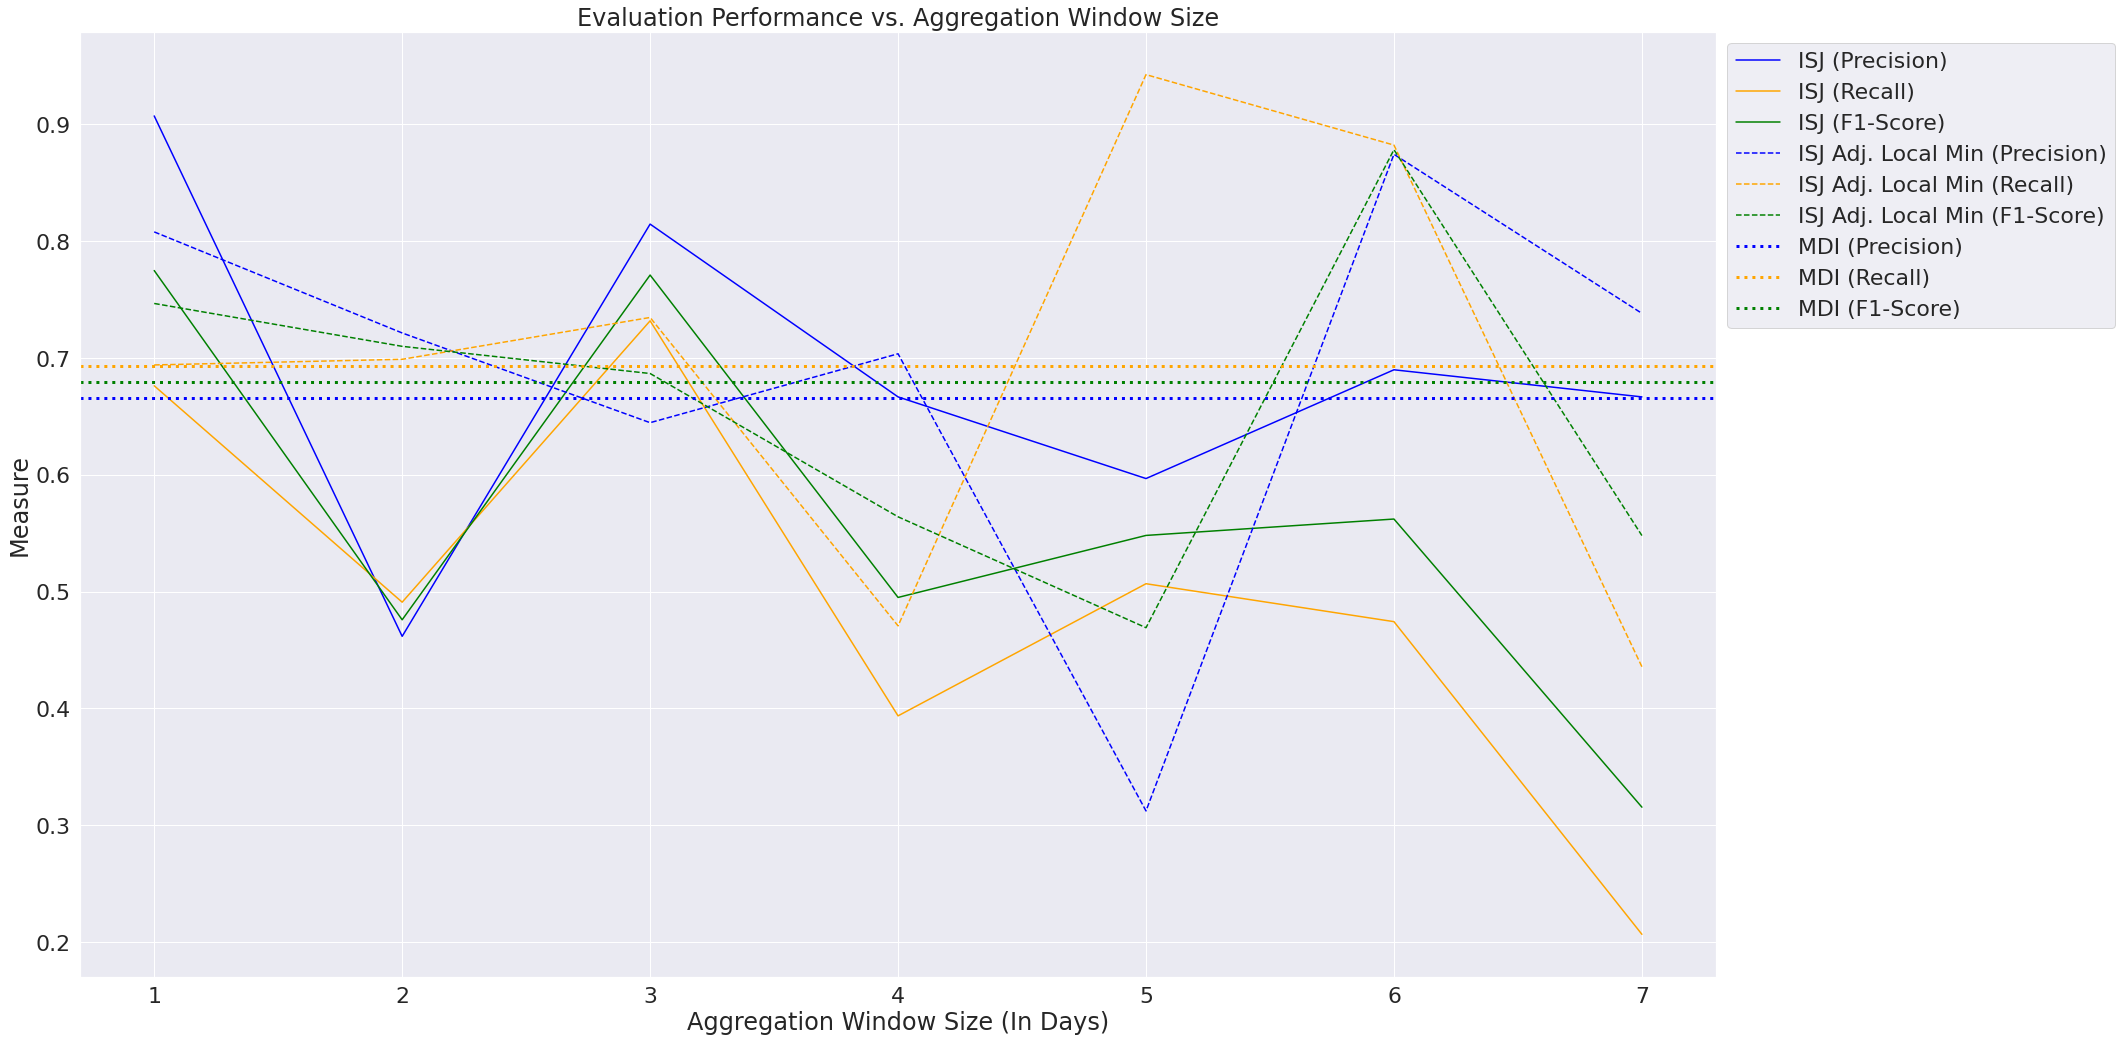

In [55]:
variable_window_sizes_interval_dir = '../real_data/MDI_datasets/hurricane/evaluation/variable_window_size/'

window_sizes = []
ISJ_precision, ISJ_recall, ISJ_f1_score = [], [], []
adj_ISJ_precision, adj_ISJ_recall, adj_ISJ_f1_score = [], [], []

# Get evaluation over ISJ
for window_size in sorted(os.listdir(variable_window_sizes_interval_dir + 'ISJ/')):
    window_sizes.append(int(window_size))
    # Read the clusters_df and compute the evaluation metrics
    clusters_df = pd.read_pickle(variable_window_sizes_interval_dir + 'ISJ/' + window_size + '/clusters_df.pickle').sort_values(by='area', ascending=False).head(3)
    predicted_ranges, predicted_ranges_outlier_bounds = get_predicted_ranges(clusters_df)
    precision, recall, f1_score = get_eval_scores(real_ranges, predicted_ranges)
    ISJ_precision.append(precision);ISJ_recall.append(recall);ISJ_f1_score.append(f1_score)

# Get evaluation over ISJ with Adjusted Local Minima
for window_size in sorted(os.listdir(variable_window_sizes_interval_dir + 'ISJ_adj_local_min/')):
    # Read the clusters_df and compute the evaluation metrics
    clusters_df = pd.read_pickle(variable_window_sizes_interval_dir + 'ISJ_adj_local_min/' + window_size + '/clusters_df.pickle').sort_values(by='area', ascending=False).head(3)
    predicted_ranges, predicted_ranges_outlier_bounds = get_predicted_ranges(clusters_df)
    precision, recall, f1_score = get_eval_scores(real_ranges, predicted_ranges_outlier_bounds)
    adj_ISJ_precision.append(precision);adj_ISJ_recall.append(recall);adj_ISJ_f1_score.append(f1_score)

# Plot Figure
sns.set(rc={'figure.figsize':(30, 15)}, font_scale=2)
plt.plot(window_sizes, ISJ_precision, label='ISJ (Precision)', color='blue')
plt.plot(window_sizes, ISJ_recall, label='ISJ (Recall)', color='orange')
plt.plot(window_sizes, ISJ_f1_score, label='ISJ (F1-Score)', color='green')

plt.plot(window_sizes, adj_ISJ_precision, label='ISJ Adj. Local Min (Precision)', color='blue', linestyle='--')
plt.plot(window_sizes, adj_ISJ_recall, label='ISJ Adj. Local Min (Recall)', color='orange', linestyle='--')
plt.plot(window_sizes, adj_ISJ_f1_score, label='ISJ Adj. Local Min (F1-Score)', color='green', linestyle='--')

plt.axhline(y=mdi_precision, label='MDI (Precision)', color='blue', linestyle=':', linewidth=3)
plt.axhline(y=mdi_recall, label='MDI (Recall)', color='orange', linestyle=':', linewidth=3)
plt.axhline(y=mdi_f1_score, label='MDI (F1-Score)', color='green', linestyle=':', linewidth=3)

plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.xlabel('Aggregation Window Size (In Days)');plt.ylabel('Measure');plt.title('Evaluation Performance vs. Aggregation Window Size');plt.tight_layout()
plt.savefig('../figures/real_data/MDI_datasets/hurricane/evaluation_vs_window_size.svg')

#### Evaluation using our method

##### ISJ

In [10]:
clusters_df = pd.read_pickle('../real_data/MDI_datasets/hurricane/evaluation/ISJ/wave_height/clusters_df.pickle').sort_values(by='area', ascending=False).head(3)
predicted_ranges, predicted_ranges_outlier_bounds = get_predicted_ranges(clusters_df)
get_range_based_eval_scores(real_ranges, predicted_ranges, predicted_ranges_outlier_bounds)

Full Bounds:
Precision: 0.6898757821985617 Recall: 0.47426375569611645 F1-Score: 0.5621028558500636

Outlier Bounds:
Precision: 0.7801932367149759 Recall: 0.45587295109841525 F1-Score: 0.5754853530577698


##### ISJ (Adjusted Local Minima)

In [11]:
clusters_df = pd.read_pickle('../real_data/MDI_datasets/hurricane/evaluation/ISJ_adj_local_min/wave_height/clusters_df.pickle').sort_values(by='area', ascending=False).head(3)
predicted_ranges, predicted_ranges_outlier_bounds = get_predicted_ranges(clusters_df)
get_range_based_eval_scores(real_ranges, predicted_ranges, predicted_ranges_outlier_bounds)

Full Bounds:
Precision: 0.7365725183638294 Recall: 0.9394268619115099 F1-Score: 0.8257234670135895

Outlier Bounds:
Precision: 0.8743509865005192 Recall: 0.882223271925681 F1-Score: 0.8782694889461095


##### Fixed Bandwidth

In [12]:
clusters_df = pd.read_pickle('../real_data/MDI_datasets/hurricane/evaluation/fixed_bandwidth/wave_height/clusters_df.pickle').sort_values(by='area', ascending=False).head(3)
predicted_ranges, predicted_ranges_outlier_bounds = get_predicted_ranges(clusters_df)
get_range_based_eval_scores(real_ranges, predicted_ranges, predicted_ranges_outlier_bounds)

Full Bounds:
Precision: 0.6368501529051988 Recall: 0.997716894977169 F1-Score: 0.7774488760745368

Outlier Bounds:
Precision: 0.8743509865005192 Recall: 0.882223271925681 F1-Score: 0.8782694889461095


### Aggregated Evaluation (Across all features)

In [112]:
from KDEpy import FFTKDE
def get_clusters_df(df, outlier_timestamps, adjusted_local_minima=False, threshold=0.5):
    s = np.linspace(df['unix_time'].min()-100,df['unix_time'].max()+100, num=3*len(df.index))

    # Compute KDE
    model = FFTKDE(kernel='epa', bw='ISJ').fit(outlier_timestamps)
    density = model.evaluate(s)

    # Construct the density_df
    density_df = pd.DataFrame({'unix_time': s, 'density': density})
    density_df['timestamp'] = pd.to_datetime(density_df['unix_time'], unit='s')

    # Find the Minima points from the log_density distribution
    mi, ma = utils.clustering.get_local_minima(density), utils.clustering.get_local_maxima(density)

    if adjusted_local_minima:
        mi = utils.clustering.get_adjusted_local_minima(mi, ma, density, threshold)

    # Find the clusters and save them in a dataframe
    clusters_df = utils.clustering.get_clusters_df(
        samples=s, density_dist=density, minima_idx_list=mi,
        points=np.array(outlier_timestamps).reshape(-1,1)
    )

    return density_df, clusters_df

In [113]:
input_dir = '../real_data/MDI_datasets/hurricane/evaluation/ISJ_adj_local_min/'
features = ['air_pressure', 'wave_height', 'wind_speed']
outlier_timestamps=[]

# Load the df.pickle from each feature and aggregate all detected outliers across all views
for feature in features:
    df = pd.read_pickle(input_dir + feature + '/df.pickle')
    outliers_df = df.copy()[df['raw_voting_score'] > 0]
    for _, row in outliers_df.iterrows():
        # outlier_timestamps += [row["unix_time"]] * row['raw_voting_score']
        outlier_timestamps += [row["unix_time"]]

##### ISJ

In [121]:
# Compute KDE over all outlier timestamps
df = pd.read_pickle(input_dir + 'wave_height/df.pickle')
density_df, clusters_df = get_clusters_df(df, outlier_timestamps, adjusted_local_minima=False, threshold=0.5)
clusters_df = clusters_df.sort_values(by='area', ascending=False).head(3).reset_index()

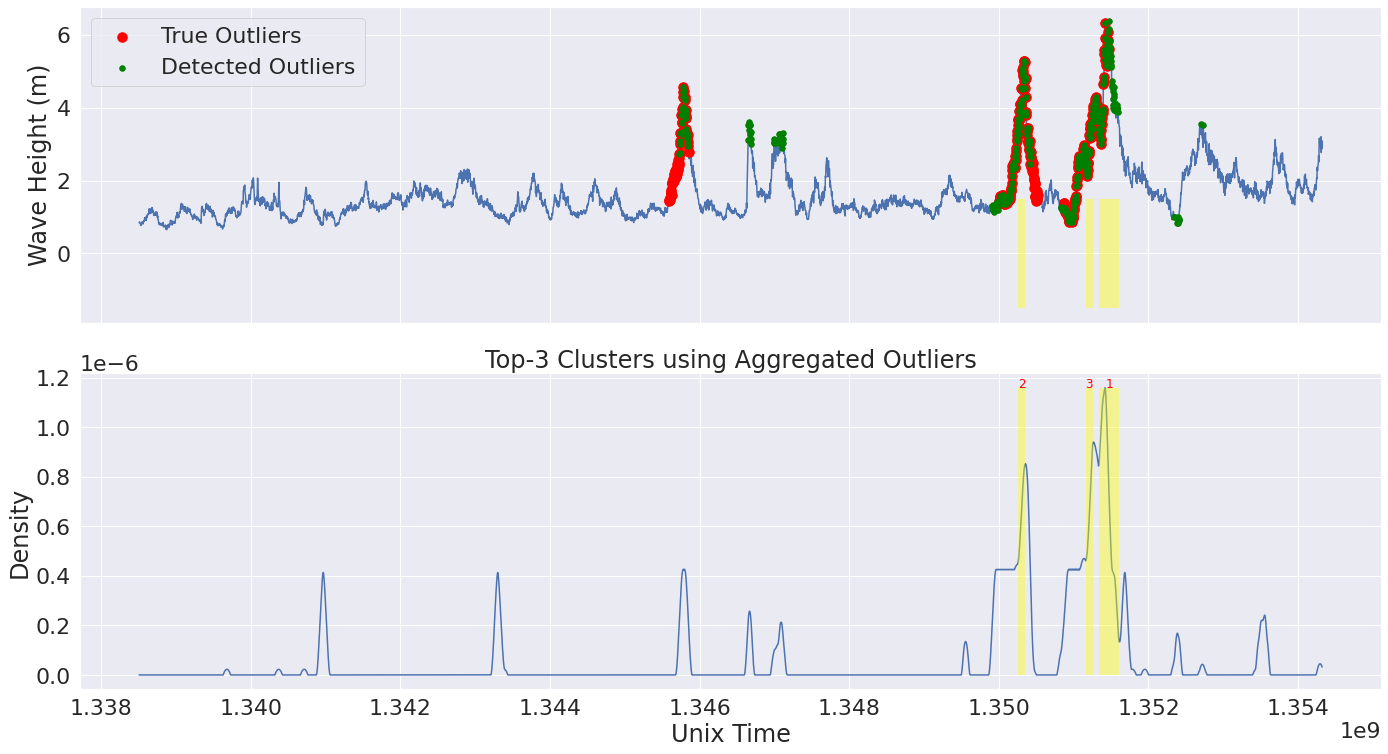

In [122]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

df = df.sort_values(by='timestamp')

# Plot the Figure
fig, axs = plt.subplots(2, sharex=True)
fig.subplots_adjust(hspace=0)

plt.title("Top-3 Clusters using Aggregated Outliers")
axs[0].plot(df['unix_time'], df['measure'])
axs[0].scatter(df[df['is_outlier']==1]['unix_time'].values, df[df['is_outlier']==1]['measure'].values, s=90, c='red', zorder=10, label='True Outliers')
axs[0].scatter(df[df['raw_voting_score']>0]['unix_time'].values, df[df['raw_voting_score']>0]['measure'].values, s=30, c='green', zorder=10, label='Detected Outliers')
axs[0].set_ylabel('Wave Height (m)');axs[0].legend()

# Plot the alert regions
for _, alert in clusters_df.iterrows():
    axs[0].add_patch(patches.Rectangle((alert['start'], -1.5), width=alert['end']-alert['start'], height=3, linewidth=0, color='yellow', zorder=10, alpha=0.40))

axs[1].plot(density_df['unix_time'], density_df['density'])
axs[1].set_ylabel('Density');axs[1].set_xlabel('Unix Time')
for idx, alert in clusters_df.iterrows():
    axs[1].add_patch(patches.Rectangle((alert['start'], 0), width=alert['end']-alert['start'], height=density_df['density'].max(), linewidth=0, color='yellow', zorder=10, alpha=0.40))
    x_loc = alert['start'] + (alert['end'] - alert['start'])/2
    axs[1].text(x=x_loc, y=density_df['density'].max(), s=str(idx+1), fontsize=12, color='red', horizontalalignment='center')

plt.tight_layout()
plt.savefig('../figures/real_data/MDI_datasets/hurricane/aggregated_evaluation_without_adjusted_local_min.svg')

In [123]:
predicted_ranges, predicted_ranges_outlier_bounds = get_predicted_ranges(clusters_df)
get_range_based_eval_scores(real_ranges, predicted_ranges, predicted_ranges_outlier_bounds)

Full Bounds:
Precision: 0.8311688311688311 Recall: 0.39756852343059235 F1-Score: 0.5378636267423502

Outlier Bounds:
Precision: 0.8425925925925926 Recall: 0.39756852343059235 F1-Score: 0.5402335044414165


#### ISJ (Adjusted Local Minima)

In [127]:
# Compute KDE over all outlier timestamps
df = pd.read_pickle(input_dir + 'wave_height/df.pickle')
density_df, clusters_df = get_clusters_df(df, outlier_timestamps, adjusted_local_minima=True, threshold=0.5)
clusters_df = clusters_df.sort_values(by='area', ascending=False).head(3).reset_index()

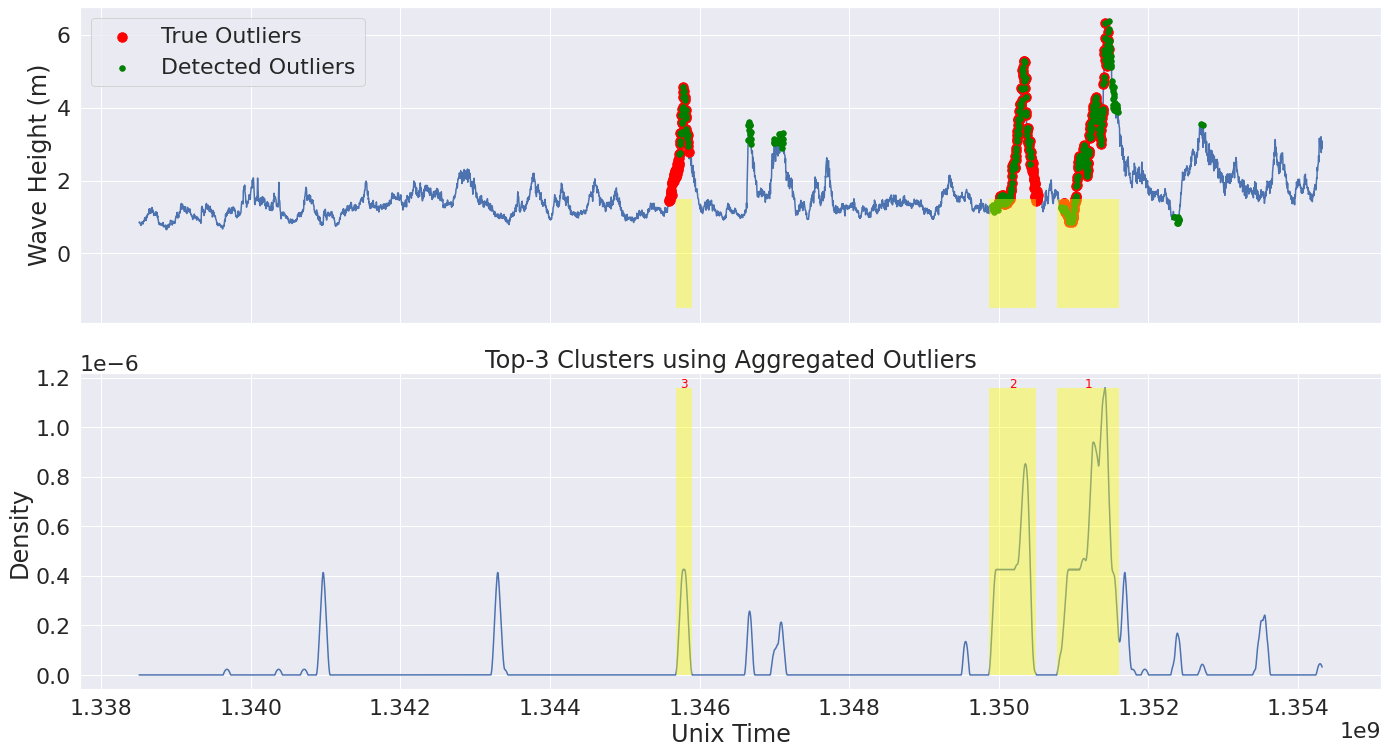

In [128]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

df = df.sort_values(by='timestamp')

# Plot the Figure
fig, axs = plt.subplots(2, sharex=True)
fig.subplots_adjust(hspace=0)

plt.title("Top-3 Clusters using Aggregated Outliers")
axs[0].plot(df['unix_time'], df['measure'])
axs[0].scatter(df[df['is_outlier']==1]['unix_time'].values, df[df['is_outlier']==1]['measure'].values, s=90, c='red', zorder=10, label='True Outliers')
axs[0].scatter(df[df['raw_voting_score']>0]['unix_time'].values, df[df['raw_voting_score']>0]['measure'].values, s=30, c='green', zorder=10, label='Detected Outliers')
axs[0].set_ylabel('Wave Height (m)');axs[0].legend()

# Plot the alert regions
for _, alert in clusters_df.iterrows():
    axs[0].add_patch(patches.Rectangle((alert['start'], -1.5), width=alert['end']-alert['start'], height=3, linewidth=0, color='yellow', zorder=10, alpha=0.40))

axs[1].plot(density_df['unix_time'], density_df['density'])
axs[1].set_ylabel('Density');axs[1].set_xlabel('Unix Time')
for idx, alert in clusters_df.iterrows():
    axs[1].add_patch(patches.Rectangle((alert['start'], 0), width=alert['end']-alert['start'], height=density_df['density'].max(), linewidth=0, color='yellow', zorder=10, alpha=0.40))
    x_loc = alert['start'] + (alert['end'] - alert['start'])/2
    axs[1].text(x=x_loc, y=density_df['density'].max(), s=str(idx+1), fontsize=12, color='red', horizontalalignment='center')

plt.tight_layout()
plt.savefig('../figures/real_data/MDI_datasets/hurricane/aggregated_evaluation.svg')

In [129]:
predicted_ranges, predicted_ranges_outlier_bounds = get_predicted_ranges(clusters_df)
get_range_based_eval_scores(real_ranges, predicted_ranges, predicted_ranges_outlier_bounds)

Full Bounds:
Precision: 0.7640838333227036 Recall: 0.9394583530152731 F1-Score: 0.8427439547734565

Outlier Bounds:
Precision: 0.8765732087227415 Recall: 0.8891198236498189 F1-Score: 0.8828019394837496


#### MDI

In [87]:
mdi_regions = pd.read_csv('../real_data/MDI_datasets/hurricane/mdi_top10_regions.csv')
mdi_regions['Start'] = pd.to_datetime(mdi_regions['Start'])
mdi_regions['End'] = pd.to_datetime(mdi_regions['End'])
mdi_regions['unix_start'] = mdi_regions['Start'].apply(lambda x: x.timestamp())
mdi_regions['unix_end'] = mdi_regions['End'].apply(lambda x: x.timestamp())

mdi_regions = mdi_regions.head(3)
predicted_ranges = []
for _, predicted_range_row  in mdi_regions.iterrows():
    predicted_range = [predicted_range_row['unix_start'], predicted_range_row['unix_end']]
    predicted_ranges.append(predicted_range)

mdi_precision = utils.range_based_precision(real_ranges, predicted_ranges)
mdi_recall = utils.range_based_recall(real_ranges, predicted_ranges)
mdi_f1_score = utils.compute_f1_score(mdi_precision, mdi_recall) 
print("Precision:", mdi_precision, 'Recall:', mdi_recall, 'F1-Score:', mdi_f1_score)

Precision: 0.8364632237871675 Recall: 0.7515192594186817 F1-Score: 0.791719340886467


### Wind Speed

#### ISJ

In [240]:
clusters_df = pd.read_pickle('../real_data/MDI_datasets/hurricane/evaluation/ISJ/wind_speed/clusters_df.pickle').sort_values(by='area', ascending=False).head(3)

predicted_ranges, predicted_ranges_outlier_bounds = get_predicted_ranges(clusters_df)
get_range_based_eval_scores(real_ranges, predicted_ranges, predicted_ranges_outlier_bounds)

Full Bounds:
Precision: 0.6666666666666666 Recall: 0.4087575757575757 F1-Score: 0.506786140306386

Outlier Bounds:
Precision: 0.6666666666666666 Recall: 0.38367424242424236 F1-Score: 0.4870472549797443


#### ISJ (Adjusted Local Minima)

In [241]:
clusters_df = pd.read_pickle('../real_data/MDI_datasets/hurricane/evaluation/ISJ/wind_speed/clusters_df.pickle').sort_values(by='area', ascending=False).head(3)

predicted_ranges, predicted_ranges_outlier_bounds = get_predicted_ranges(clusters_df)
get_range_based_eval_scores(real_ranges, predicted_ranges, predicted_ranges_outlier_bounds)

Full Bounds:
Precision: 0.6666666666666666 Recall: 0.4087575757575757 F1-Score: 0.506786140306386

Outlier Bounds:
Precision: 0.6666666666666666 Recall: 0.38367424242424236 F1-Score: 0.4870472549797443


# Testing

In [193]:
density_df = pd.read_pickle('../real_data/MDI_datasets/hurricane/evaluation/ISJ_adj_local_min/density_df.pickle')
# density_df = density_df[(density_df['unix_time'] >= 1.347e9) & (density_df['unix_time']<=1.351e9)].reset_index(drop=True)

mi, ma = utils.clustering.get_local_minima(density_df['density'].to_numpy()), utils.clustering.get_local_maxima(density_df['density'].to_numpy())
mi = utils.clustering.get_adjusted_local_minima(mi, ma, density_df['density'].to_numpy(), threshold=0.5)
mi_ma_indices = mi + ma
mi

[5984,
 6227,
 6747,
 6852,
 7038,
 7215,
 9750,
 9972,
 10245,
 10443,
 10599,
 10980,
 11547,
 11622]

In [194]:
density_df.loc[mi_ma_indices]

,unix_time,density,timestamp
5984,1.345689e+09,2.220446e-16,2012-08-23 02:21:41.001669376
6227,1.345980e+09,2.220446e-16,2012-08-26 11:21:00.434056704
6747,1.346604e+09,2.220446e-16,2012-09-02 16:39:33.622704384
6852,1.346730e+09,2.220446e-16,2012-09-04 03:39:16.093489152
7038,1.346953e+09,2.220446e-16,2012-09-06 17:38:45.041736192
7215,1.347165e+09,2.220446e-16,2012-09-09 04:38:15.492487424
9750,1.350207e+09,2.220446e-16,2012-10-14 09:31:12.287145216
9972,1.350473e+09,2.220446e-16,2012-10-17 11:30:35.225375744
10245,1.350801e+09,2.220446e-16,2012-10-21 06:29:49.649415680
10443,1.351039e+09,2.220446e-16,2012-10-24 00:29:16.594323968


In [195]:
minima_times = []
for idx in mi:
    minima_times.append(density_df.loc[idx]['unix_time'])
minima_times

[1345688501.0016694,
 1345980060.4340568,
 1346603973.6227045,
 1346729956.0934892,
 1346953125.0417361,
 1347165495.4924874,
 1350207072.2871451,
 1350473435.2253757,
 1350800989.6494157,
 1351038556.5943239,
 1351225730.550918,
 1351682866.9449081,
 1352363172.2871451,
 1352453159.766277]

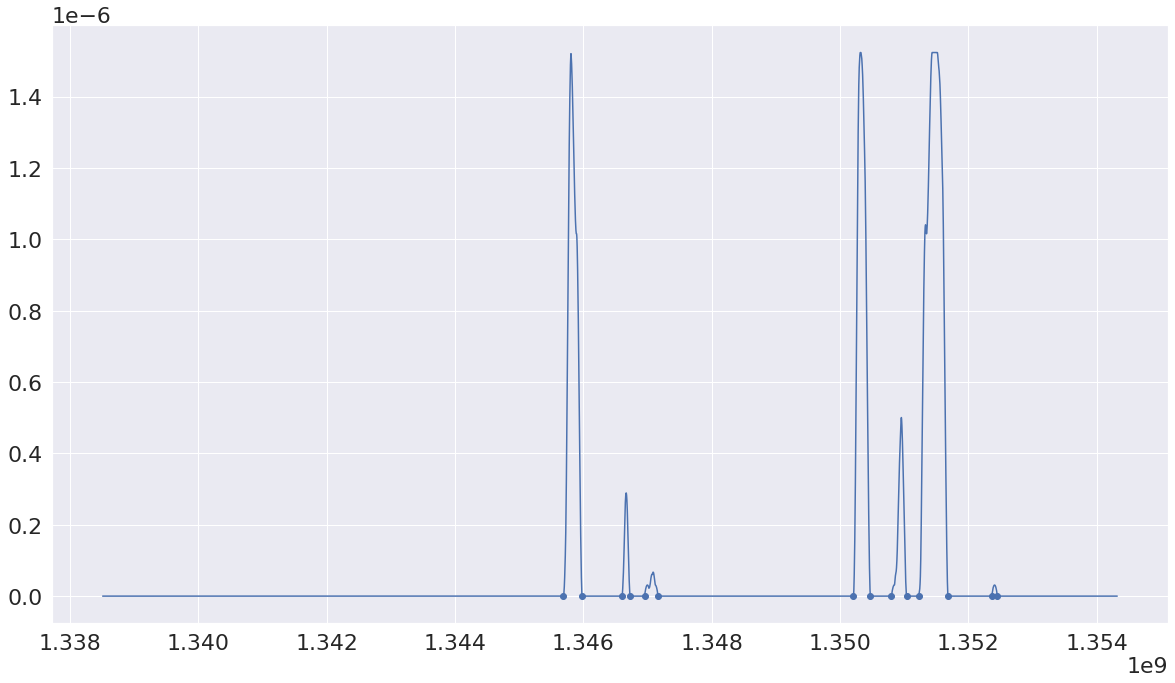

In [196]:
plt.plot(density_df['unix_time'], density_df['density'])
plt.scatter(minima_times, np.zeros(len(minima_times)))

In [15]:
df = pd.read_pickle('../real_data/att_data_usage/data_df.pickle')
df

,MOTS_ID,DEVICE,DVC_CATEGORY_TITLE,DVC_SUB_CATEGORY_TITLE,OS,TECH_TYPE,PLANGRP,PLANFRIENDLY,PLAN4,PLAN,...,SALES_CLUSTER,METRIC_NAME,timestamp,measure,expected,dev,lookback,count,num_alerts,grp_size
0,1,iPhone XS,SmartPhones,iPhone,iOS,LTE,NaN,NaN,NaN,NaN,...,New York Region,usgmb,2019-12-12,6.38933,6.37767,0.04232,28,12,0,336
1,1,iPhone XS,SmartPhones,iPhone,iOS,LTE,NaN,NaN,NaN,NaN,...,New York Region,usgmb,2019-10-04,6.38438,5.96487,0.35147,28,12,3,336
2,1,iPhone XS,SmartPhones,iPhone,iOS,LTE,NaN,NaN,NaN,NaN,...,New York Region,usgmb,2019-10-05,6.38172,5.99000,0.35553,28,12,3,336
3,1,iPhone XS,SmartPhones,iPhone,iOS,LTE,NaN,NaN,NaN,NaN,...,New York Region,usgmb,2019-10-06,6.39745,6.01580,0.35686,28,12,3,336
4,1,iPhone XS,SmartPhones,iPhone,iOS,LTE,NaN,NaN,NaN,NaN,...,New York Region,usgmb,2019-10-07,6.39742,6.04163,0.35739,28,12,0,336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,1,iPhone XS,SmartPhones,iPhone,iOS,LTE,NaN,NaN,NaN,NaN,...,New York Region,usgmb,2021-06-10,5.41654,5.43263,0.04282,28,12,0,336
617,1,iPhone XS,SmartPhones,iPhone,iOS,LTE,NaN,NaN,NaN,NaN,...,New York Region,usgmb,2021-06-11,5.34032,5.43164,0.04286,28,12,0,336
618,1,iPhone XS,SmartPhones,iPhone,iOS,LTE,NaN,NaN,NaN,NaN,...,New York Region,usgmb,2021-06-12,5.37232,5.42708,0.04555,28,12,0,336
619,1,iPhone XS,SmartPhones,iPhone,iOS,LTE,NaN,NaN,NaN,NaN,...,New York Region,usgmb,2021-06-13,5.34196,5.42162,0.04243,28,12,0,336


In [34]:
regions_df = pd.read_pickle('../real_data/att_data_usage/regions_df.pickle')
regions_df

,start_timestamp,end_timestamp,region_id,start,end,length
0,2020-03-10,2020-03-17,0,159,166,8
1,2020-05-25,2020-06-3,1,235,244,10
2,2020-09-25,2020-10-8,2,358,371,14


In [36]:
regions_df = pd.read_pickle('../streaming_data/synthetic_data/all_outlier_types/seed_1/regions_df.pickle')
regions_df

,region_id,start,end,length,injection_mode
0,0,1033,1056,24,level_shift
1,1,1931,1954,24,high_residual_consistent
2,2,2201,2224,24,level_shift
3,3,3439,3462,24,high_residual_consistent
4,4,4179,4202,24,high_residual_consistent
5,5,6219,6242,24,high_residual_nearest
6,6,7364,7387,24,level_shift
7,7,7737,7760,24,high_residual_nearest
8,8,8117,8140,24,high_residual_consistent
9,9,9325,9348,24,high_residual_consistent
